In [2]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [3]:
!nvidia-smi

Tue May 23 21:25:04 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    23W / 300W |      0MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.4/589.4 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.5/206.5 kB 24.4 MB/s eta 0:00:00


In [5]:
#import yolo
from ultralytics import YOLO
from IPython.display import display, Image

In [7]:
#Unzip the dataset folder
!unzip -uq /content/drive/MyDrive/human_emotion_dataset.zip

In [8]:
#load a pretrained model
model= YOLO('yolov8l.pt')

100%|██████████| 83.7M/83.7M [00:01<00:00, 51.3MB/s]


In [9]:
#train the model
model.train(data= '/content/human_emotion_dataset/data.yaml', epochs= 25)

Ultralytics YOLOv8.0.107 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/human_emotion_dataset/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=Fa

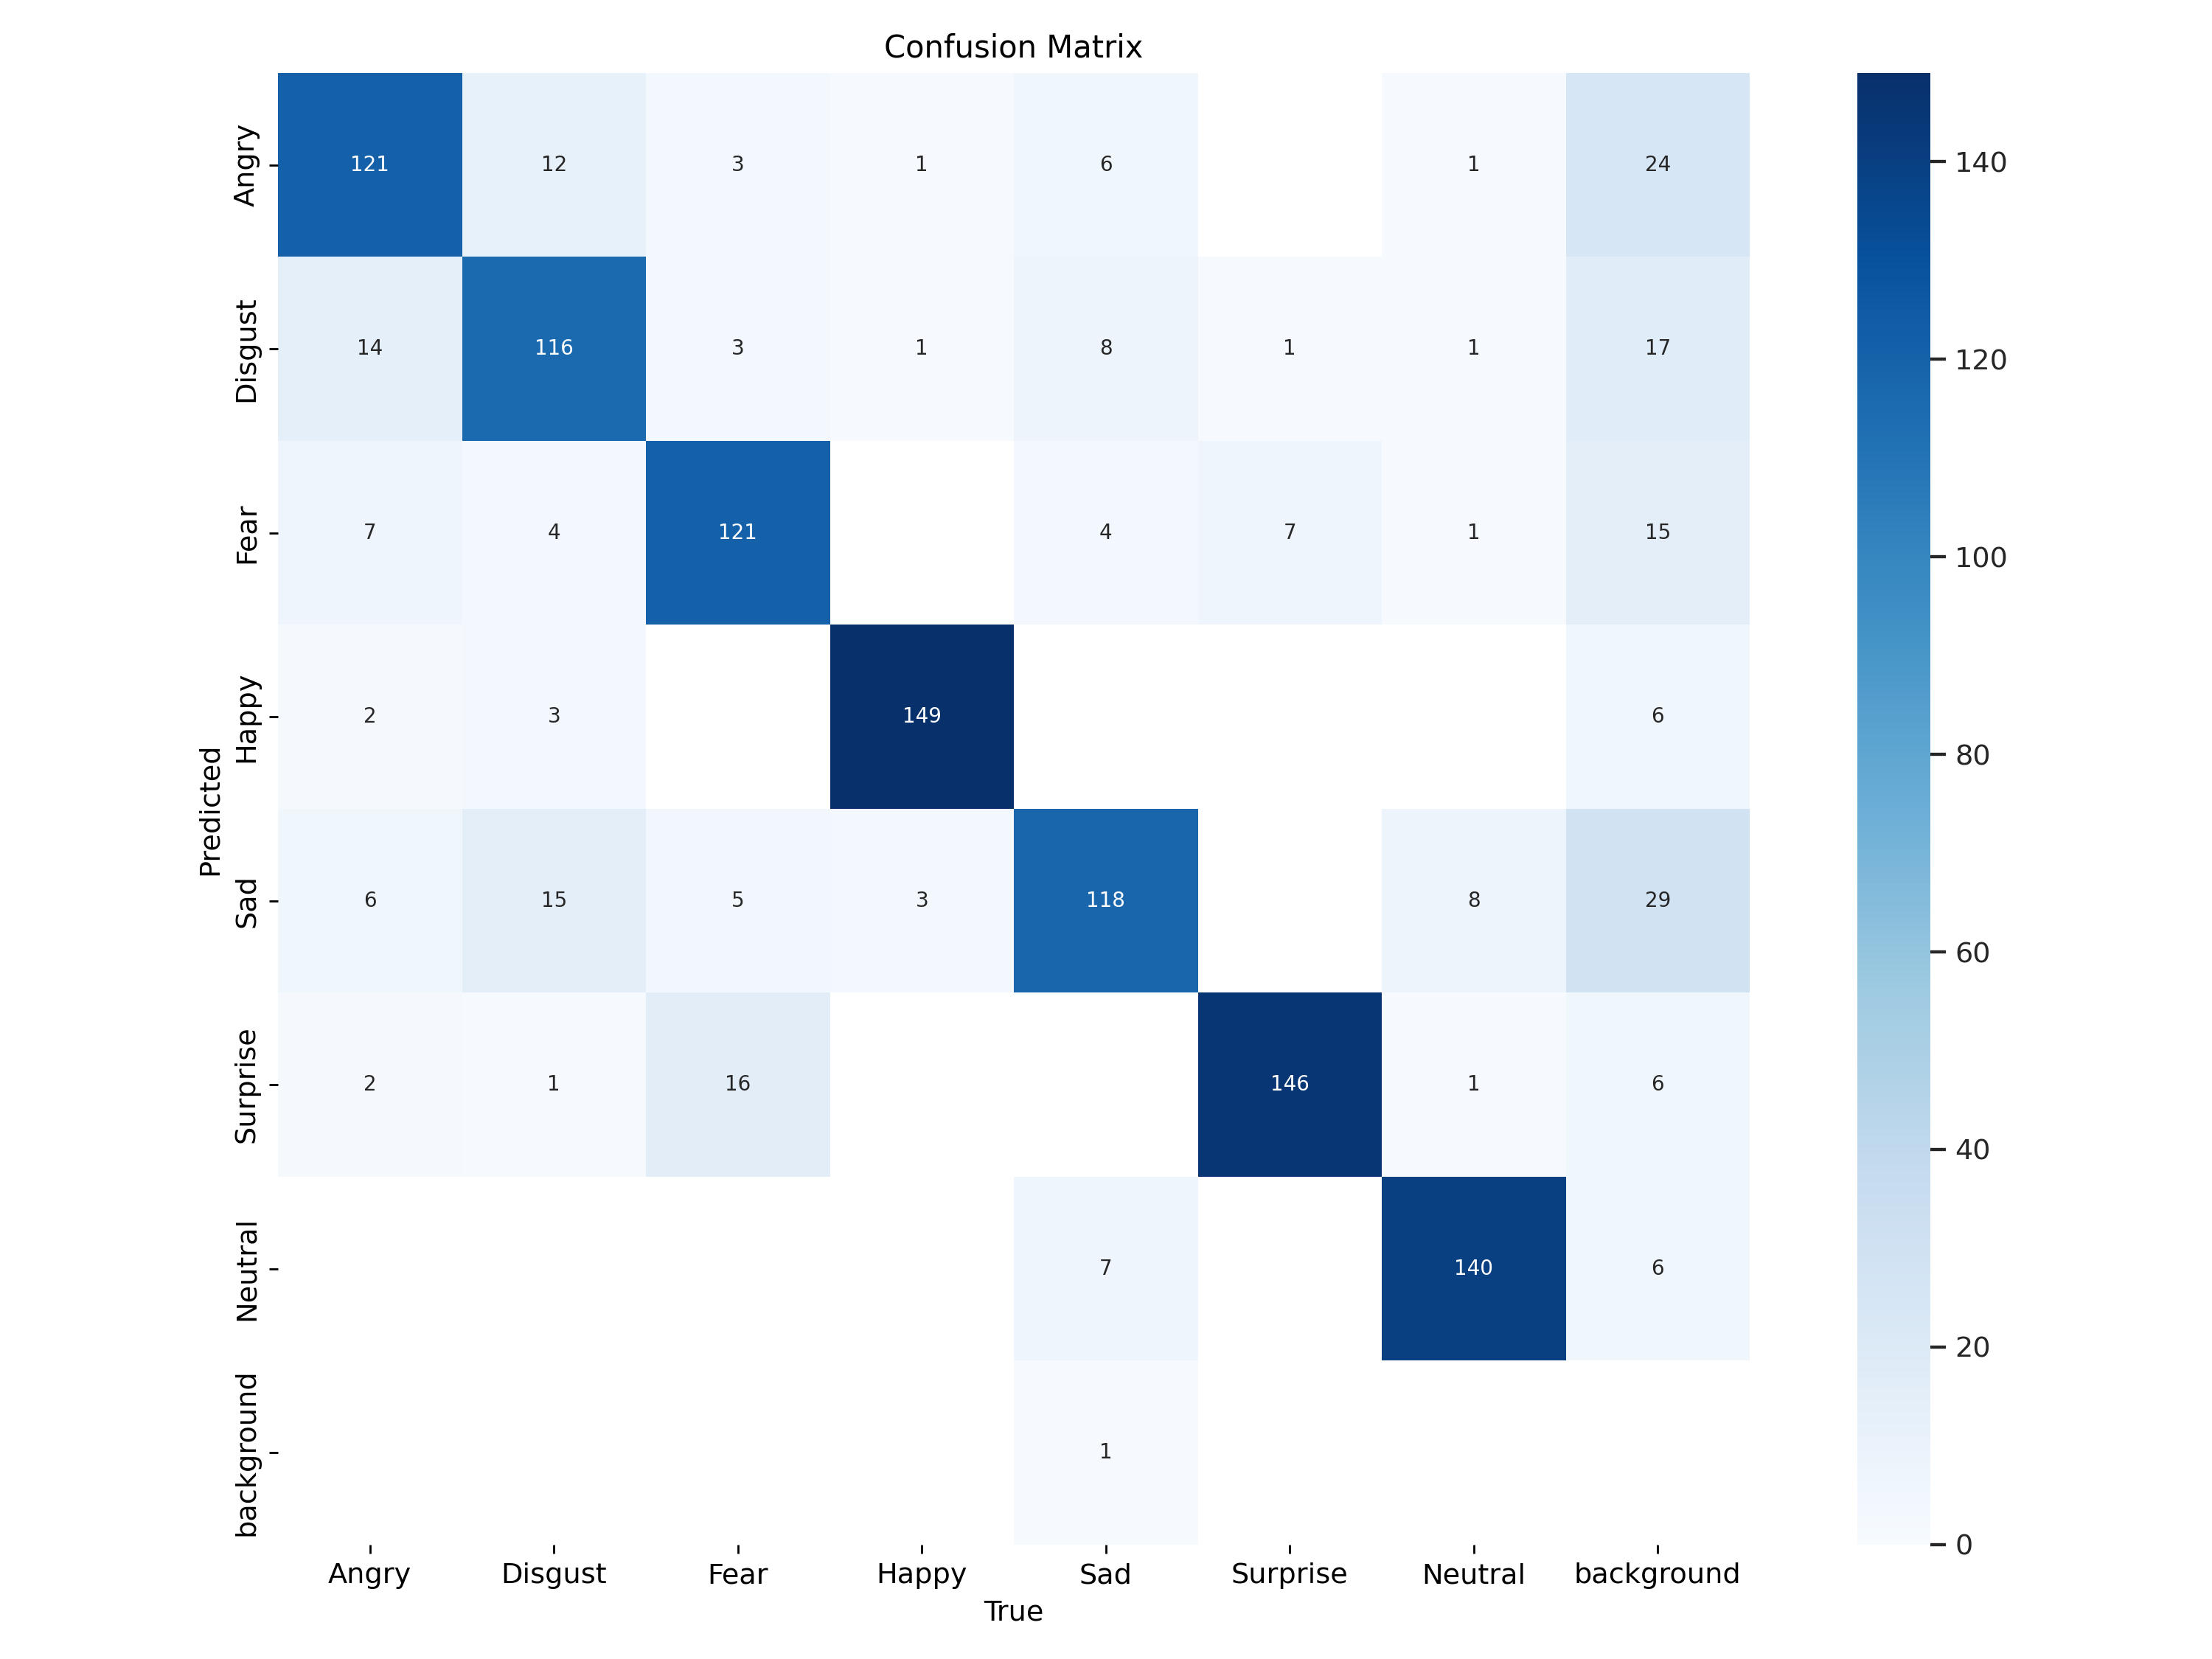

In [11]:
# display confusion matrix
Image(filename="/content/runs/detect/train/confusion_matrix.png", width= 800)

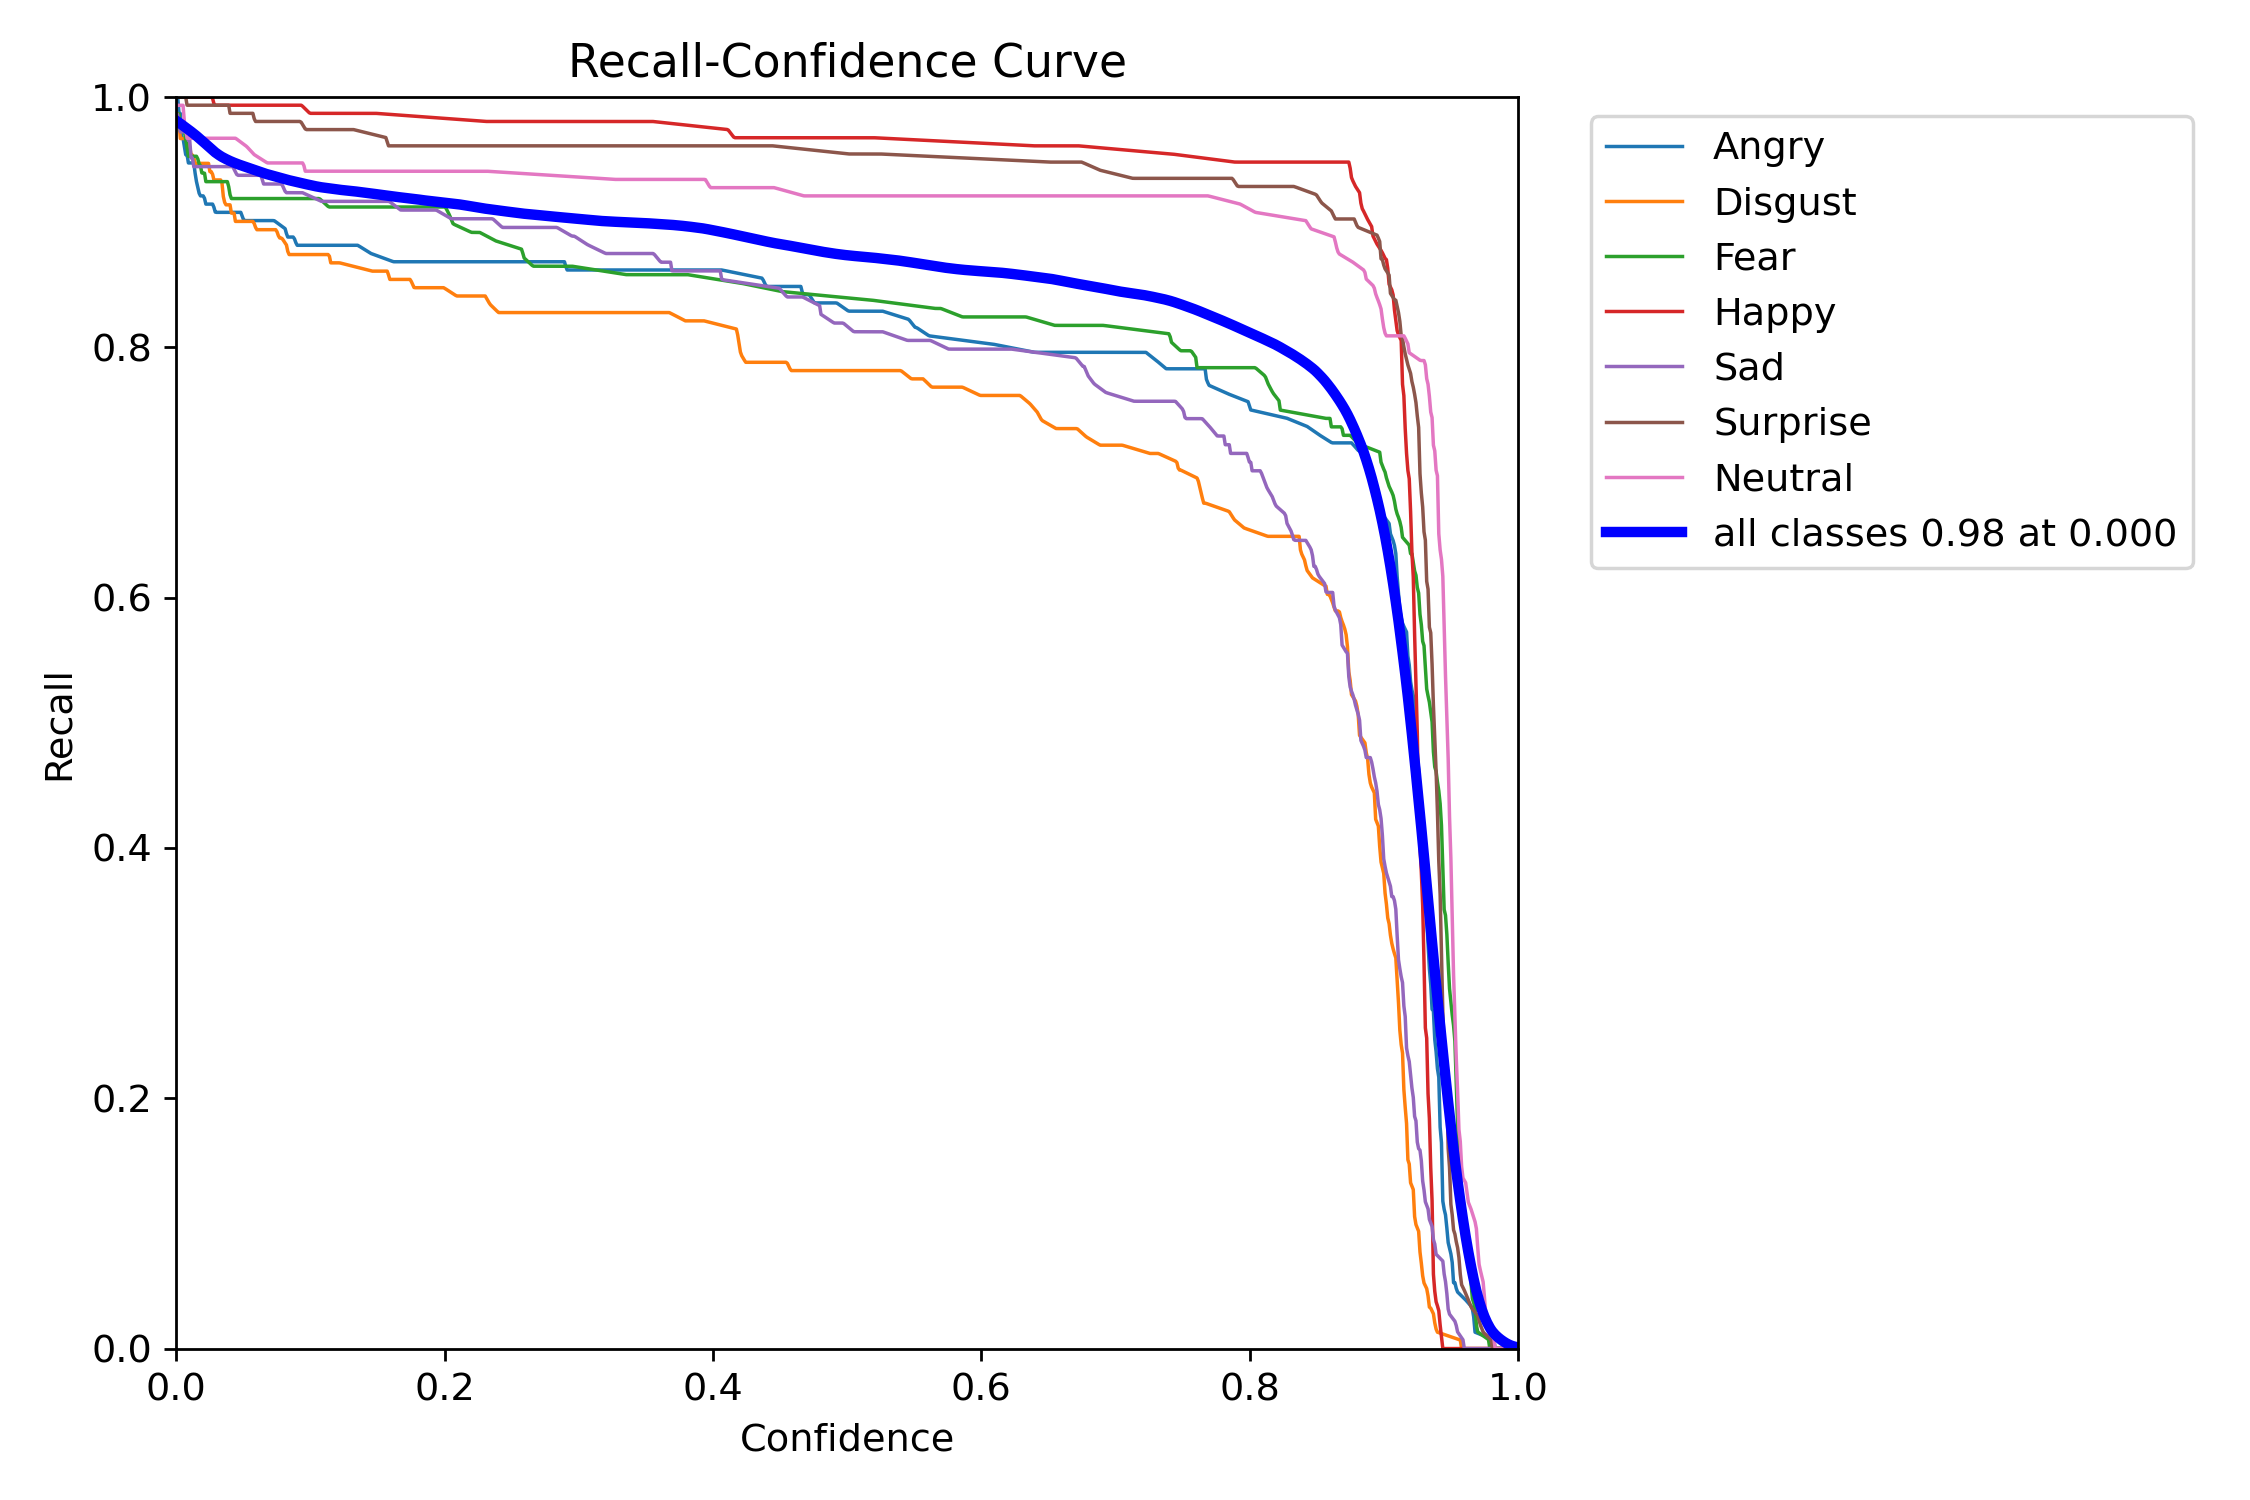

In [19]:
# display R_curve
Image(filename="/content/runs/detect/train/R_curve.png", width= 800)

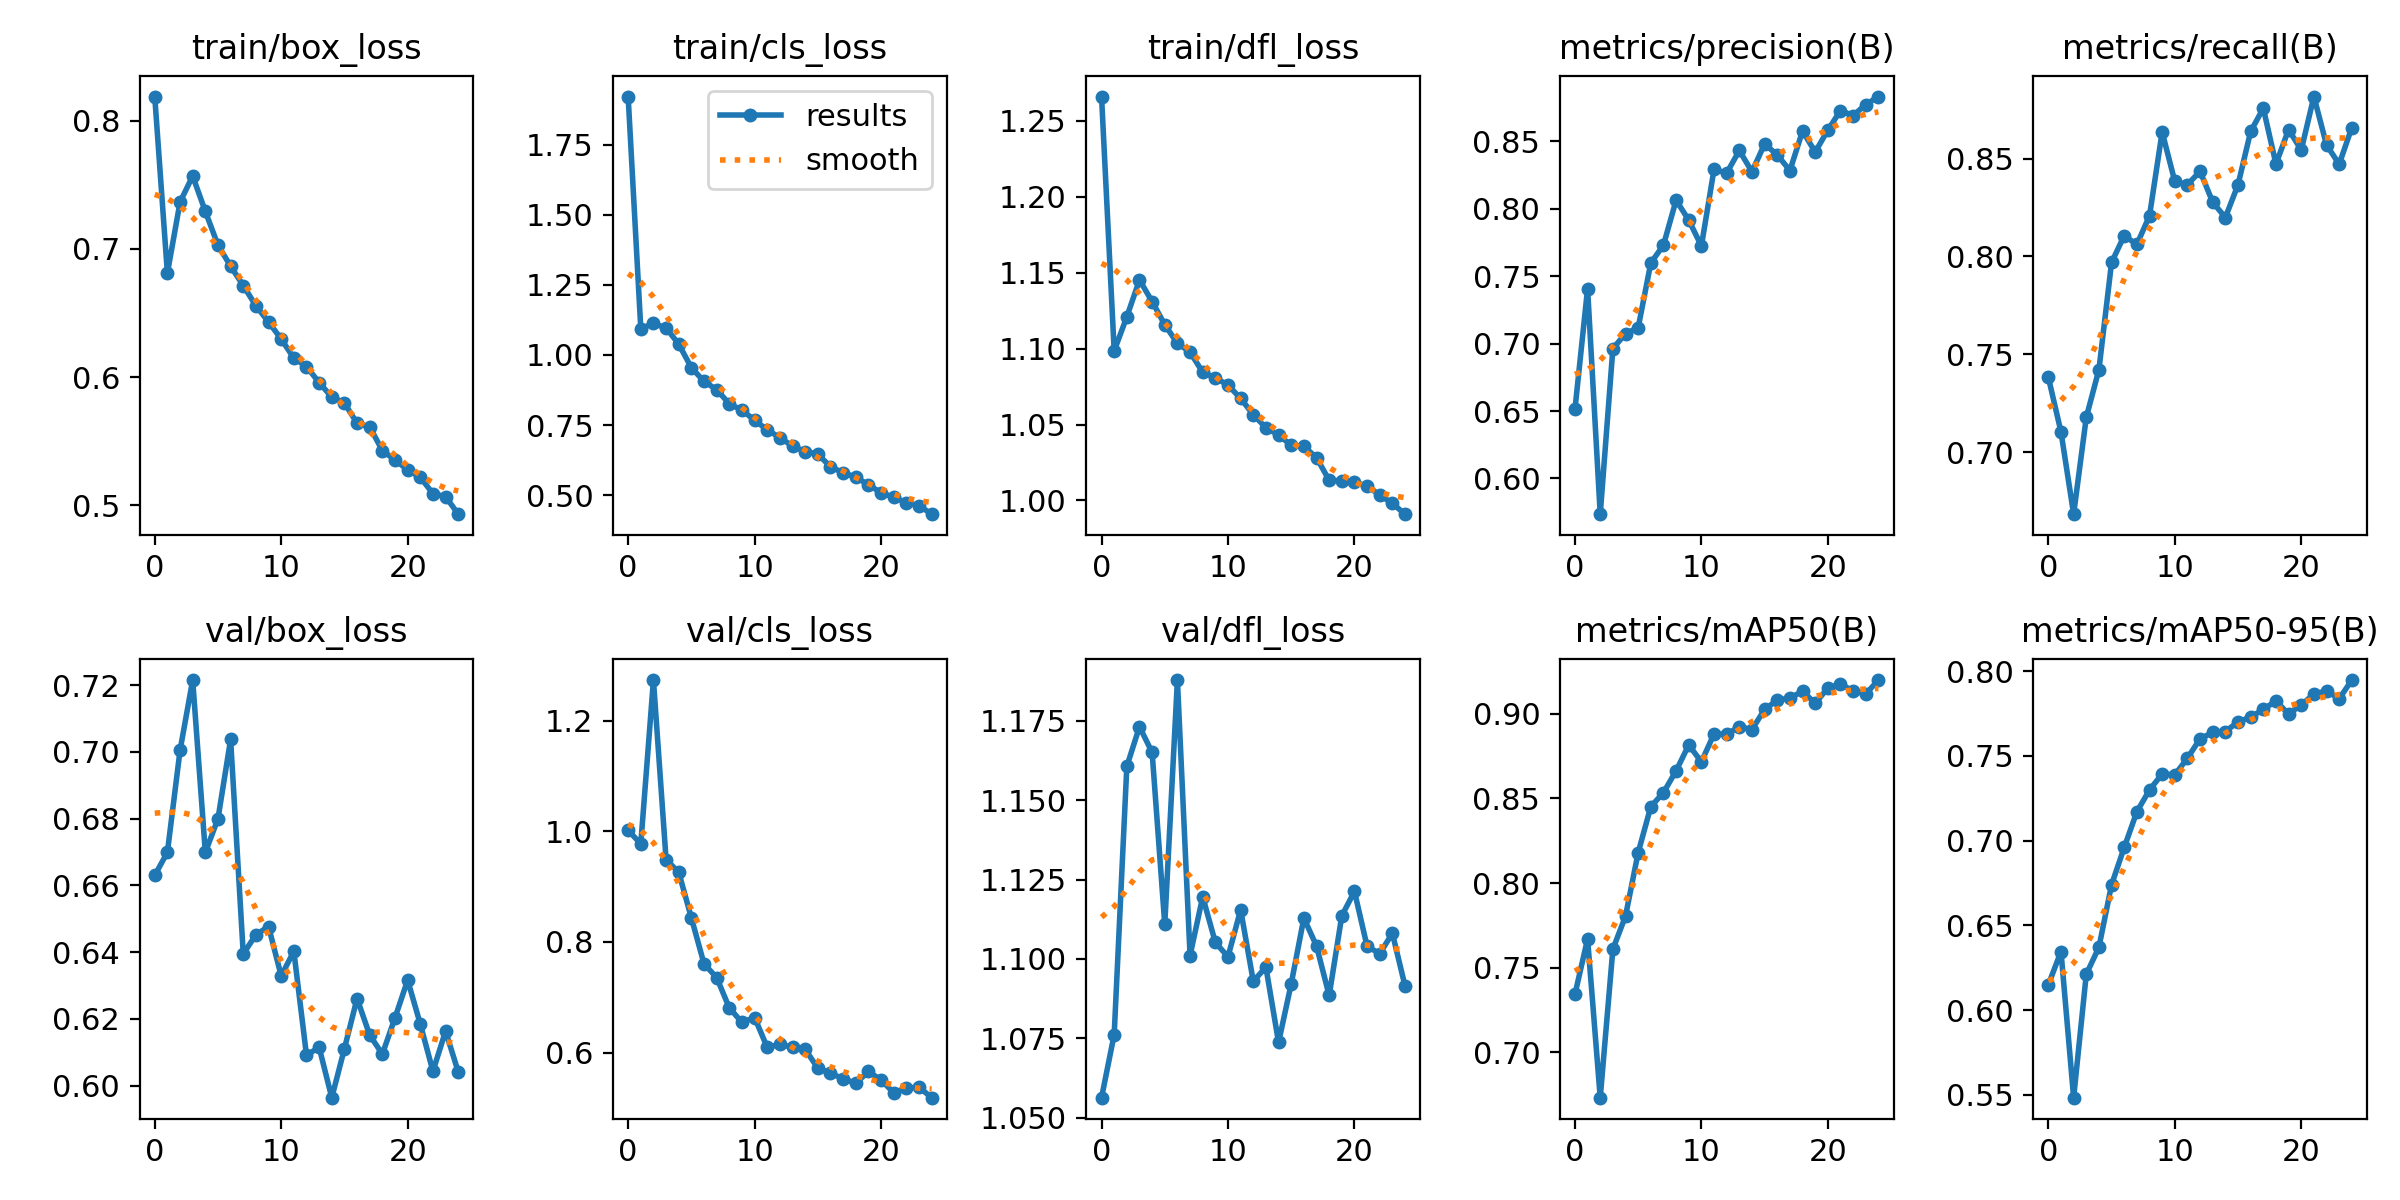

In [18]:
# display results
Image(filename="/content/runs/detect/train/results.png", width= 800)

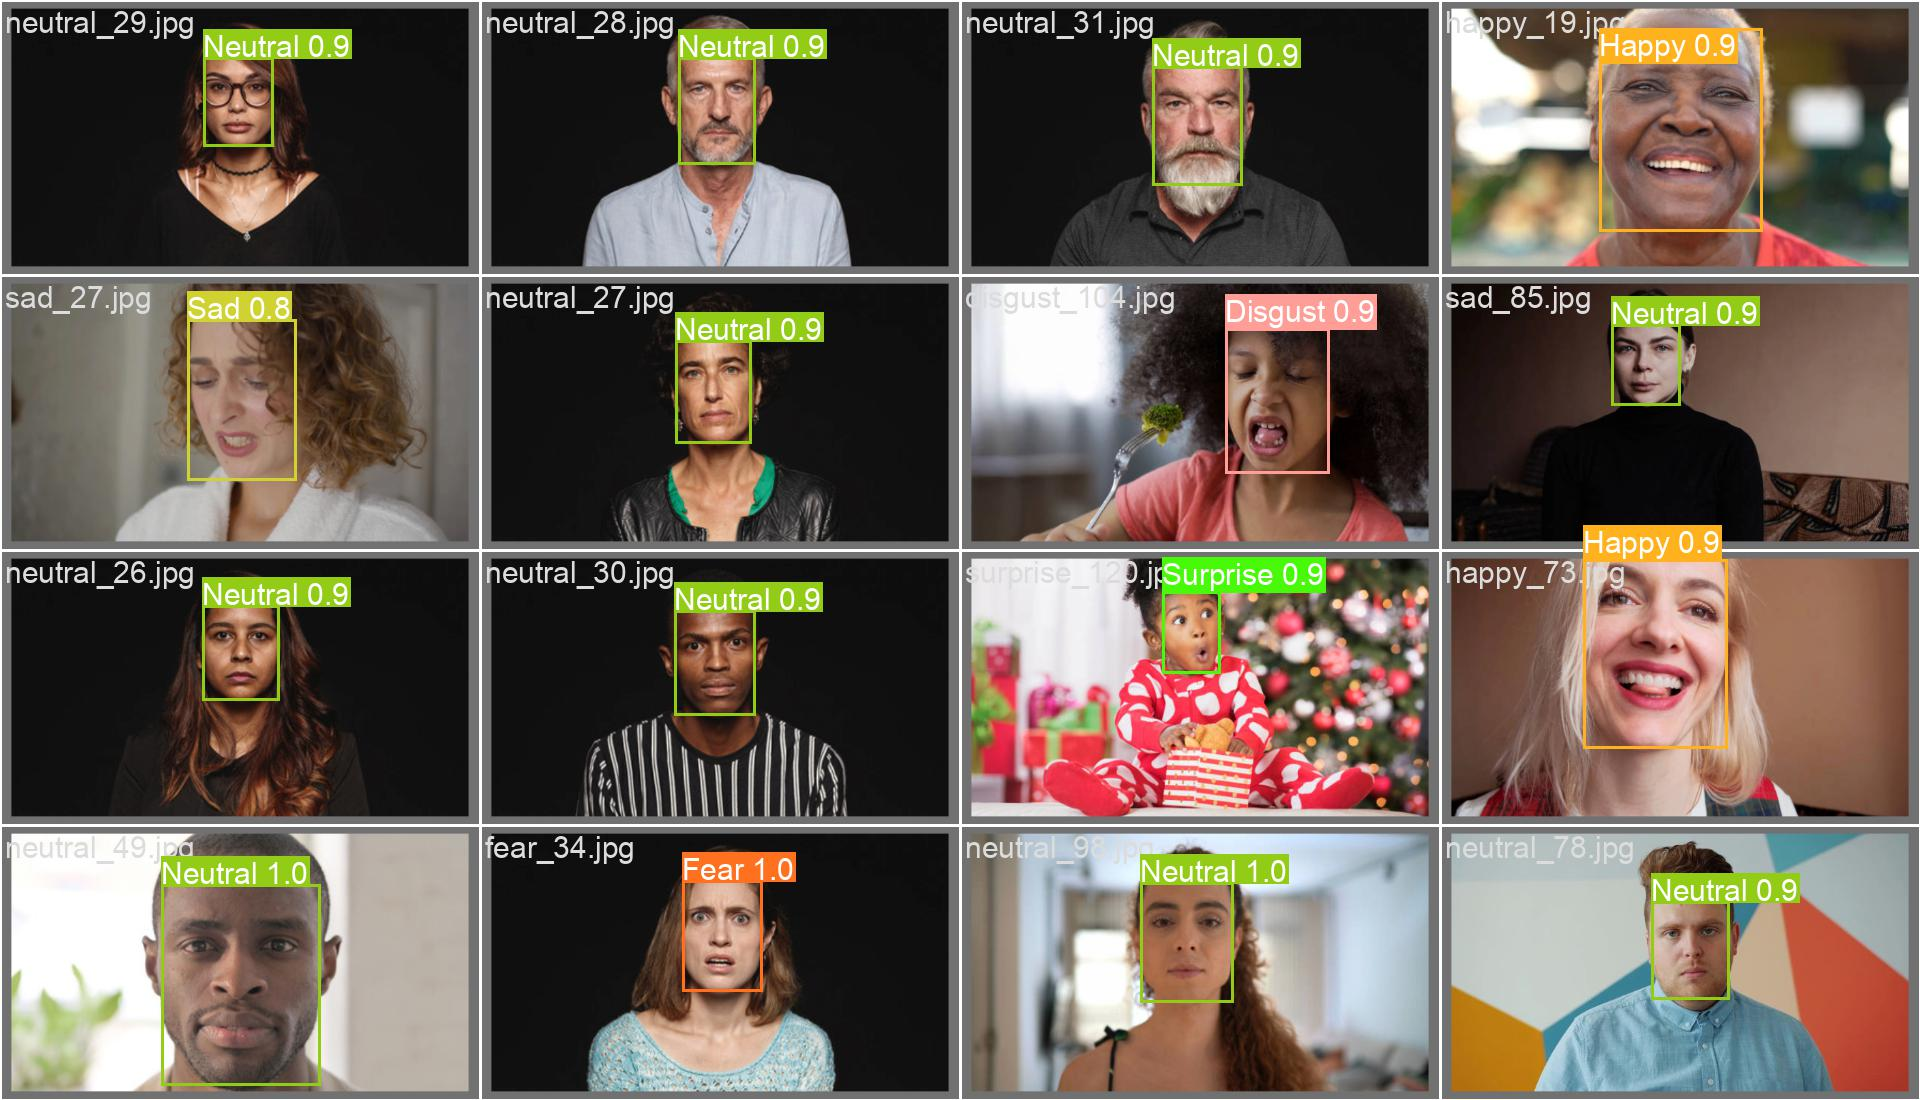

In [17]:
# display display batch prediction
Image(filename="/content/runs/detect/train/val_batch1_pred.jpg", width= 800)

In [16]:
# Validate the model
metrics= model.val()

Ultralytics YOLOv8.0.107 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
val: Scanning /content/human_emotion_dataset/val/labels.cache... 1039 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1039/1039 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 65/65 [00:20<00:00,  3.20it/s]
                   all       1039       1055      0.876      0.872       0.92      0.795
                 Angry       1039        152      0.883      0.829      0.887      0.679
               Disgust       1039        151      0.858      0.781      0.885      0.732
                  Fear       1039        148      0.827      0.838      0.887      0.768
                 Happy       1039        154      0.967      0.968      0.987      0.865
                   Sad       1039        144      0.765      0.812      0.868      0.766
              Surprise       1039        154      0.888      0.955      0.956   